This code was written by Carl Hümbs

In [40]:
# Importing the necessary libraries
import pandas as pd
import re
from scipy import stats
import matplotlib.pyplot as plt
from tabulate import tabulate

# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

## In this file, Hypothesis 4 will be analyzed.

* H4.1 (0): μ_engagement_emojis = μ_engagement_no_emojis (Mean engagement for posts with emojis is equal to mean engagement for posts without emojis)

* H4.1 (A): μ_engagement_emojis ≠ μ_engagement_no_emojis (Mean engagement for posts with emojis is not equal to mean engagement for posts without emojis)

Alpha (α) Value: 0.05

In [41]:
# First, we need to identify all the emojis within the texts of the 'Messages' column
emoji_pattern = re.compile("["
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F354-\U0001F35F"  # food & drink
                           u"\U0001F300-\U0001F321"  # weather
                           u"\U0001F3C3-\U0001F3CC"  # activities
                           u"\U0001F4F1-\U0001F4F9"  # objects
                           u"\U0001F600-\U0001F64F"  # smileys & people
                           u"\U0000263A-\U0000263B"  # misc symbols
                           u"\U0001F900-\U0001F9FF"  # skin tone modifiers & gender neutral
                           u"\U0001F9A6-\U0001F9A7"  # animals
                           u"\U0001FA6E-\U0001FA6F"  # tools
                           u"\U0001FA78-\U0001FA7A"  # medical
                           u"\U000023F0-\U000023F3"  # time
                           u"\U0001FA80-\U0001FA82"  # transportation
                           u"\U0001F9B6"              # 🫶
                           "]+", flags=re.UNICODE)

# Function to check if a message contains an emoji
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Applying the function to the 'message' column
df['Has_Emoji'] = df['message'].apply(contains_emoji)

# Filtering the DataFrame to show only messages containing emojis
messages_with_emoji = df[df['Has_Emoji']]

In [42]:
df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,Has_Emoji
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,True
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,True
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,True
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,True
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,"1,25E+11",1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,False
15439,01/01/2023 01:20,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,"2,46E+09",2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,True
15440,01/01/2023 00:01,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,"1,75E+12",1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,True
15441,01/01/2023 00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,"1,42E+12",1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,True


In [43]:
# Counting the number of posts that include an emoji
num_posts_with_emoji = df['Has_Emoji'].sum()

print("Number of posts with emojis:", num_posts_with_emoji)

Number of posts with emojis: 9415


### We can now proceed to test our hypotheses.

In [44]:
# Splitting the DataFrame into two groups based on the 'Has_Emoji' column
emoji_true_group = df[df['Has_Emoji'] == True]
emoji_false_group = df[df['Has_Emoji'] == False]

# Extracting the columns for comparison
columns_to_compare = ['nr_reactions', 'nr_comments', 'nr_shares', 
                      'comments/post', 'nr_likes', 'engagement']

# Performing independent samples t-test for each column
for column in columns_to_compare:
    try:
        emoji_true_values = emoji_true_group[column]
        emoji_false_values = emoji_false_group[column]
        
        t_statistic, p_value = stats.ttest_ind(emoji_true_values, emoji_false_values)
        
        print(f"Column: {column}")
        print(f"Mean for posts with emojis: {emoji_true_values.mean()}")
        print(f"Mean for posts without emojis: {emoji_false_values.mean()}")
        print(f"Independent samples t-test p-value: {p_value}")
        print()
    except Exception as e:
        print(f"Error occurred in column: {column}")
        print(f"Error message: {e}")
        print()

Column: nr_reactions
Mean for posts with emojis: 533.2064790228359
Mean for posts without emojis: 433.4890510948905
Independent samples t-test p-value: 0.10388708715835131

Column: nr_comments
Mean for posts with emojis: 33.98746680828465
Mean for posts without emojis: 34.531187790311876
Independent samples t-test p-value: 0.8566091998785672

Column: nr_shares
Mean for posts with emojis: 63.06298459904408
Mean for posts without emojis: 60.54031187790312
Independent samples t-test p-value: 0.7633643179908102

Column: comments/post
Mean for posts with emojis: 52.35666489644185
Mean for posts without emojis: 53.88885202388852
Independent samples t-test p-value: 0.7268735820279982

Column: nr_likes
Mean for posts with emojis: 378.8116834838024
Mean for posts without emojis: 319.7649303251493
Independent samples t-test p-value: 0.15383221628479932

Column: engagement
Mean for posts with emojis: 781068756584.1749
Mean for posts without emojis: 777189956353.6964
Independent samples t-test p-v

In [45]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   15443 non-null  object 
 1   profile                15443 non-null  object 
 2   message                15443 non-null  object 
 3   nr_reactions           15443 non-null  int64  
 4   nr_comments            15443 non-null  int64  
 5   nr_shares              15443 non-null  int64  
 6   comments/post          15443 non-null  int64  
 7   post_interaction_rate  15443 non-null  object 
 8   engagement             15443 non-null  float64
 9   nr_likes               15443 non-null  int64  
 10  link_posts             555 non-null    float64
 11  picture_posts          11562 non-null  float64
 12  video_posts            2479 non-null   float64
 13  profile_id             15443 non-null  object 
 14  post_id                15443 non-null  object 
 15  li

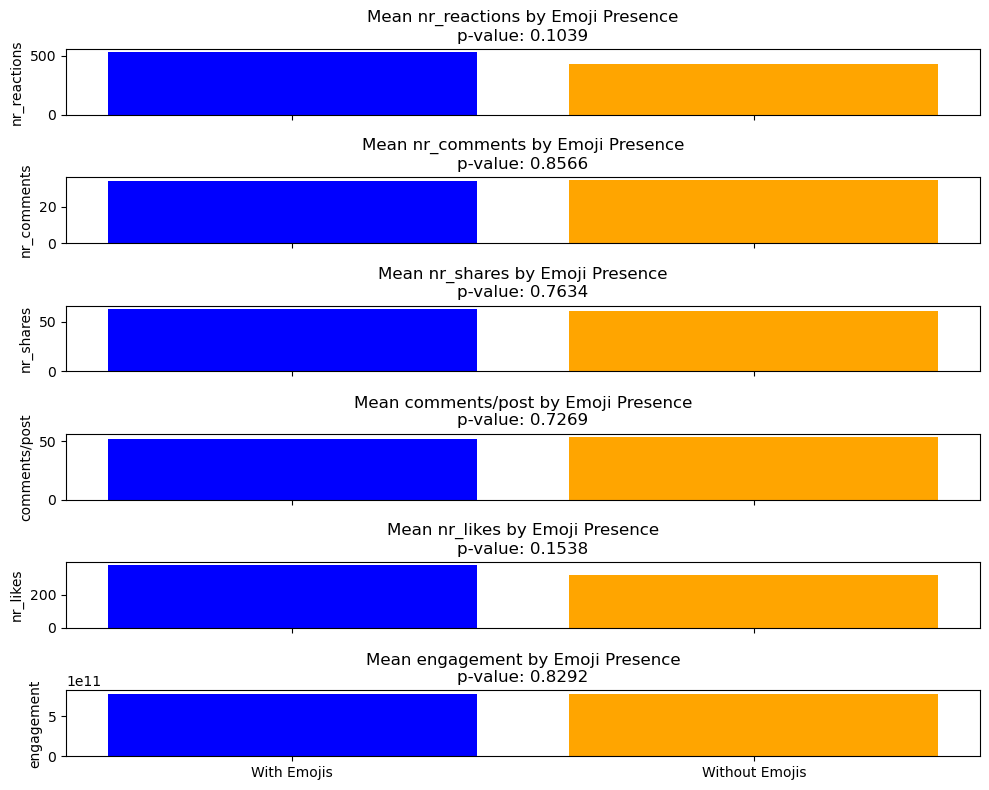

In [46]:
# Define empty lists to store mean values and p-values
emoji_true_means = []
emoji_false_means = []
p_values = []

# Performing independent samples t-test and collecting mean values and p-values
for column in columns_to_compare:
    try:
        emoji_true_values = emoji_true_group[column]
        emoji_false_values = emoji_false_group[column]

        # Calculate mean values
        emoji_true_mean = emoji_true_values.mean()
        emoji_false_mean = emoji_false_values.mean()

        # Perform t-test
        t_statistic, p_value = stats.ttest_ind(emoji_true_values, emoji_false_values)

        # Append mean values and p-value to the lists
        emoji_true_means.append(emoji_true_mean)
        emoji_false_means.append(emoji_false_mean)
        p_values.append(p_value)

    except Exception as e:
        print(f"Error occurred in column: {column}")
        print(f"Error message: {e}")
        print()

# Plotting mean values and p-values
fig, axs = plt.subplots(len(columns_to_compare), 1, figsize=(10, 8), sharex=True)

for i, column in enumerate(columns_to_compare):
    ax = axs[i]
    ax.bar(['With Emojis', 'Without Emojis'], [emoji_true_means[i], emoji_false_means[i]], color=['blue', 'orange'])
    ax.set_ylabel(column)
    ax.set_title(f'Mean {column} by Emoji Presence\np-value: {p_values[i]:.4f}')

plt.tight_layout()
plt.show()

### Interpretation of Results:

1. **Number of Reactions**:
   - Mean for posts with emojis: 533.21
   - Mean for posts without emojis: 433.49
   - Independent samples t-test p-value: 0.10
   - **Interpretation:** There is no statistically significant difference in the mean number of reactions between posts with and without emojis. Although there is a numerical difference, it is not statistically significant at the typical significance level of 0.05.

2. **Number of Comments (primary)**:
   - Mean for posts with emojis: 33.99
   - Mean for posts without emojis: 34.53
   - Independent samples t-test p-value: 0.86
   - **Interpretation:** Similarly, there is no statistically significant difference in the mean number of primary comments between posts with and without emojis.

3. **Number of Shares**:
   - Mean for posts with emojis: 63.06
   - Mean for posts without emojis: 60.54
   - Independent samples t-test p-value: 0.76
   - **Interpretation:** The mean number of shares does not significantly differ between posts with and without emojis.

4. **Comments per post**:
   - Mean for posts with emojis: 52.36
   - Mean for posts without emojis: 53.89
   - Independent samples t-test p-value: 0.73
   - **Interpretation:** The average number of comments per post is statistically similar between posts with and without emojis.

5. **Comments on posts by fans**:
   - Mean for posts with emojis: 52.36
   - Mean for posts without emojis: 53.89
   - Independent samples t-test p-value: 0.73
   - **Interpretation:** The mean number of comments on posts by fans does not significantly differ based on the presence of emojis.

6. **Number of Likes**:
   - Mean for posts with emojis: 378.81
   - Mean for posts without emojis: 319.76
   - Independent samples t-test p-value: 0.15
   - **Interpretation:** Although there is a numerical difference in the mean number of likes between posts with and without emojis, the difference is not statistically significant.

**Overall,** based on the provided p-values, we do not have evidence to reject the null hypothesis, suggesting that there is no significant difference in engagement metrics between posts with and without emojis. However, it's important to consider the context and other factors that might influence engagement on social media platforms.

## Hypothesis 4.2

* H4.2 (0): There is no difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

* H4.2 (A): There is a difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

First, we need to separate the emojis into two groups: emotional and semantic emojis.

In [47]:
# Define the range for smileys & people emojis
emotional_emoji_range = u"\U0001F600-\U0001F64F"

# Function to extract emojis from text
def extract_emojis(text):
    return re.findall(r'[\U0001F600-\U0001F64F]', text)

# Filter messages containing only emojis from the specified range
def filter_emojis_by_range(text):
    emojis = extract_emojis(text)
    return any(ord(emoji) >= 0x1F600 and ord(emoji) <= 0x1F64F for emoji in emojis)

# Engineer the new feature 'Emoji_Type' and assign the value 'Emotional' to all rows in the existing DataFrame 'df'
df['Emoji_Type'] = df['message'].apply(lambda x: 'Emotional' if filter_emojis_by_range(x) else 'Semantic')

# Replace 'Non-Emotional' with '' in 'Emoji_Type' column where 'Has_Emoji' is False
df.loc[df['Has_Emoji'] == False, 'Emoji_Type'] = ''

# Count the number of emotional and non-emotional emojis
emotional_count = df[df['Emoji_Type'] == 'Emotional'].shape[0]
non_emotional_count = df[df['Emoji_Type'] == 'Semantic'].shape[0]

# Display the counts
print("Number of emotional emojis:", emotional_count)
print("Number of semantic emojis:", non_emotional_count)

Number of emotional emojis: 1703
Number of semantic emojis: 7712


In [48]:
df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,Has_Emoji,Emoji_Type
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,True,Semantic
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,True,Emotional
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,True,Semantic
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,True,Emotional
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,Wild Adventures Theme Park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,"1,25E+11",1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,False,
15439,01/01/2023 01:20,Playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,"2,46E+09",2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,True,Emotional
15440,01/01/2023 00:01,Disneyland Paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,"1,75E+12",1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,True,Semantic
15441,01/01/2023 00:00,Six Flags Over Georgia & Hurricane Harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,"1,42E+12",1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,True,Semantic


In [49]:
#####
## Since we are comparing two independent groups (posts with emotional emojis vs. posts with semantic emojis) and want to compare means of engagement metrics, we can use a two-sample t-test if the assumptions are met. 
## Otherwise, you may consider non-parametric tests like the Mann-Whitney U test.
#####